# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 5

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **10 апреля в 23:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

from statsmodels.sandbox.stats.multicomp import multipletests

%matplotlib inline


#Теоретическая часть

# p-value (основной поток)

Задача 1. 
 Для всех пунктов задач 3 и 4 прошлого домашнего задания выпишите формулу для p-value  $p(t) = <...>$  в виде кода на `scipy`, где $t$ - реализация статистики вашего критерия, т.е. $t = T(x), x$ &mdash; реализация выборки, $T(X)$ &mdash; статистика. 

Для задачи 4 также посчитайте численные значения для обоих случаев p-value для данного в задаче существа. Какие гипотезы отклоняются? 

Вычисления можно выполнить в Питоне по приведенным вами формулам. 

# Множественная проверка гипотез (основной поток)


Задача 2.
 Пусть $X_1, ...,  X_n$ --- выборка из неизвестного распределения $\mathsf{P}$. Для проверки гипотезы $\mathsf{H}_0\ vs.\ \mathsf{H}_1$ было решено использовать три различных критерия. Соответствующие p-value равны 0.00001, 0.7361, 0.0482. Какое должно быть принято решение об отвержении гипотезы $\mathsf{H}_0$ на уровне значимости 0.05? *Подсказка: используйте любой подходящий метод МПГ, далее делайте вывод об отвержении/не отвержении, поясните свой вывод.*




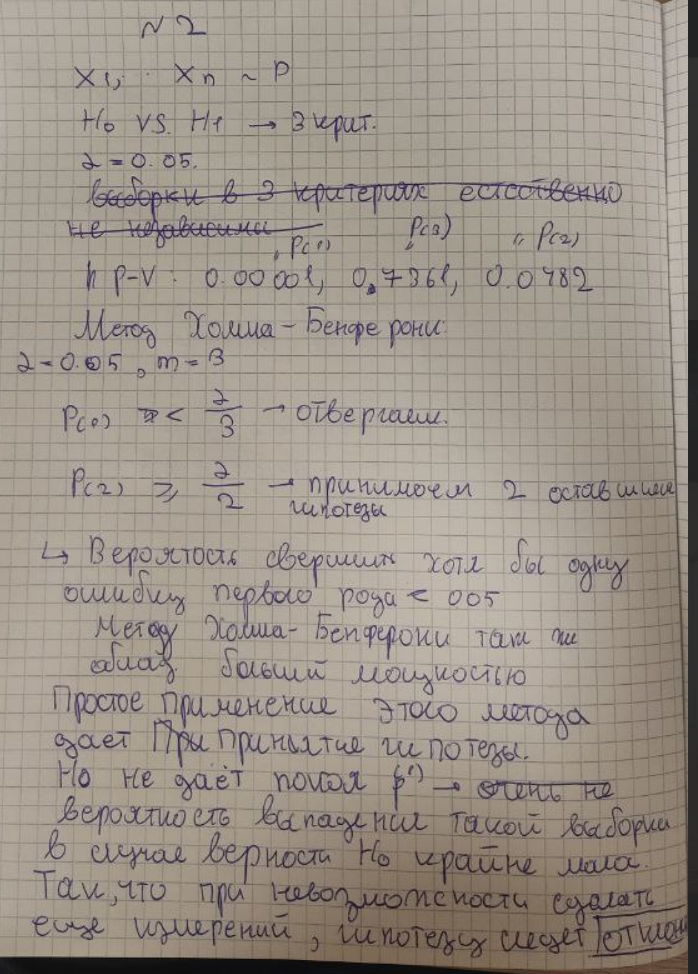

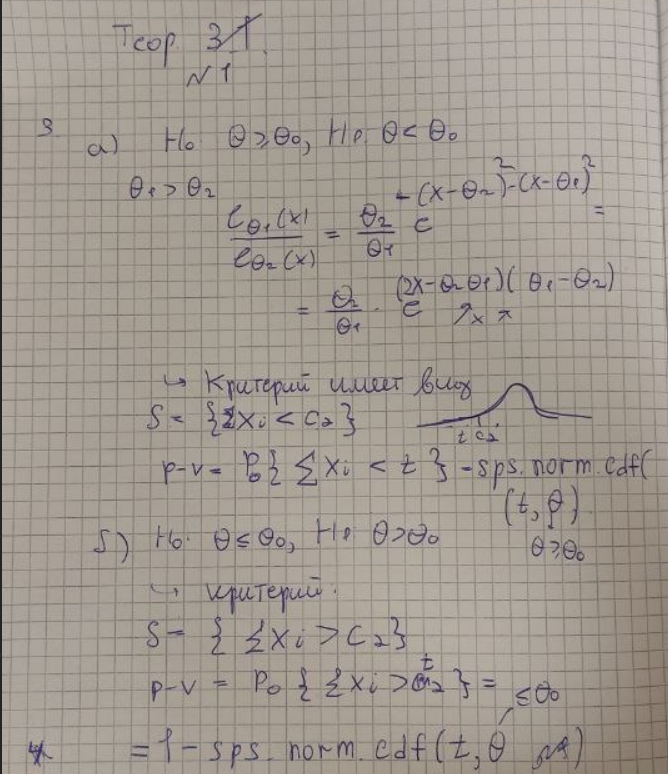

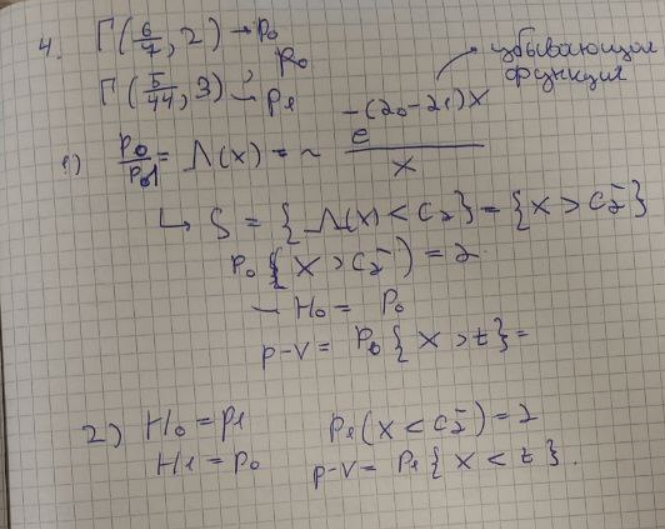

Задача 4:

In [61]:
# H0: Г(6/7,2)
1 - sps.gamma.cdf(6.66,2,scale = 7/6)

0.02225507064654919

In [62]:
# H0: Г(5/44,3)
sps.gamma.cdf(6.66,3,scale = 44/5)

0.041416397470335854

В первом случае отвержение получилось увереннее в 2 раза. Так что Гипотезу Г(6/7,2) надо отвергнуть

# Практическая часть

## Множественная проверка гипотез


###Задача 3 (все потоки).
Проведены эксперименты для оценки эффективности нескольких препаратов для снижения послеоперационной тошноты. Результаты экспериментов приведены в таблице ниже. При проведении эксперимента пациенты делились на группы случайным образом.

    
                            Количество пациентов  Количество случаев возникновения тошноты

		Плацебо                80                    45 

		Хлорпромазин           75                    26 
    
		Дименгидринат          85                    52 
    
		Пентобарбитал (100 мг) 67                    35 
    
		Пентобарбитал (150 мг) 85                    37 
    

 Проведите сравнение каждого препарата по эффективности по отношению к плацебо c использованием критерия Вальда (см. лекцию 5 и последующие). Какие методы МПГ, контролирующие FWER и FDR, можно использовать в данной задаче? Какие ответы можно получить для этих методов? В каждом случае приведите значения статистики критерия Вальда, p-value и скорректированные p-value. Поясните смысл p-value и множественной проверки гипотез в данной задаче. Оформите решение структурированно. 

In [ ]:
data = pd.DataFrame([["Плацебо", 80, 45],
    ["Хлорпромазин", 75, 26],
    ["Дименгидринат", 85, 52],
    ["Пентобарбитал (100 мг)", 67, 35],
    ["Пентобарбитал (150 мг)", 85, 37]])

data.columns = ["Название", "Количество пациентов", "Количество случаев возникновения тошноты"]

In [ ]:
data

,Название,Количество пациентов,Количество случаев возникновения тошноты
0,Плацебо,80,45
1,Хлорпромазин,75,26
2,Дименгидринат,85,52
3,Пентобарбитал (100 мг),67,35
4,Пентобарбитал (150 мг),85,37


Критерий вальда в данном случае, это $S = \{ W(x) < c \} $, Для гипотезы H_0: p = 0.5, H_1 = p < 0.5;

$p_v = P_0( W(x) <= t)$

$W(x) = \sqrt{n} \frac{\sum X/n - 1/2}{\sum X/n(1-\sum X/n)}$


In [33]:
def W(X,n):
    return np.sqrt(n)*(np.sum(X)/n - 0.5)/((np.sum(X)/n*(1-np.sum(X)/n)))

In [34]:
W_v = np.array([
    W(45,80),
    W(75,26),
    W(52,85),
    W(35,67),
    W(37,85)
])
W_v

array([ 2.27156112, -2.23663114,  4.33845114,  0.73448924, -2.42687896])

Нам нужно посчитать p_v для каждого из 4 случаев:

In [36]:
P_values  = sps.norm.cdf(W_v)

P_values

array([0.98844348, 0.01265523, 0.99999283, 0.76867469, 0.00761467])

У нас независимые выборки в совокупности, так что использовать можно все методы. 

Посмотрим на разные методы и собирем результаты в таблицу

In [53]:
A = multipletests(P_values,0.05,"sidak")[1]
A

array([1.        , 0.06169474, 1.        , 0.99933761, 0.03749791])

In [52]:
Data = pd.DataFrame([
                    ["sidak",False, False, False, False,  True],
                    ["bonferroni", False,  True, False, False,  True ],
                    ["holm",False, False, False, False,  True],
                     ["holm-sidak",False,  True, False, False,  True],
                     ["fdr_bh",False,  True, False, False,  True],
                     ["fdr_by",False, False, False, False, False]
                     
                    ])
Data

,0,1,2,3,4,5
0,sidak,False,False,False,False,True
1,bonferroni,False,True,False,False,True
2,holm,False,False,False,False,True
3,holm-sidak,False,True,False,False,True
4,fdr_bh,False,True,False,False,True
5,fdr_by,False,False,False,False,False


Так же можно поступить со скоректрованными p_v

In [56]:
Data_pv = pd.DataFrame([
                    multipletests(P_values,0.05,"sidak")[1],
                    multipletests(P_values,0.05,"bonferroni")[1],
                    multipletests(P_values,0.05,"holm")[1],
                    multipletests(P_values,0.05,"holm-sidak")[1],
                    multipletests(P_values,0.05,"fdr_bh")[1],
                    multipletests(P_values,0.05,"fdr_by")[1],
                     
                    ])

In [57]:
Data_pv

,0,1,2,3,4
0,1.000000,0.061695,1.000000,0.999338,0.037498
1,1.000000,0.063276,1.000000,1.000000,0.038073
2,1.000000,0.050621,1.000000,1.000000,0.038073
3,0.999866,0.049668,0.999993,0.987621,0.037498
4,0.999993,0.031638,0.999993,0.999993,0.031638
5,1.000000,0.072240,1.000000,1.000000,0.072240


Видно, что самые мощные методы отвергли 2 гипотезы, в то время как менее мощные приняли больше. В качестве ответа логично принять работу самых мощных методов FWER. 

Смысл множественной проверки гипотез в данном случае в том, чтобы учесть то, что при многократном повторении эксперемента неизбежно возникают ошибки 1 рода. Величины p-v в данном примере показывают, насколько далеко мы от "центра" нормального расрпеделения.